# Task 3: Building an SVM classifier

<br><br>

#### For this task we will create a Support Vector Machine to classify the authenticity of the bank note dataset from the prevous task.

 1) Load appropriate packages
 
 2) Load the bank note dataset from the previous task into a a pandas dataframe
 
 3) Define features and target in your data
 
 4) Plot a scatter plot of two of your features coloured by the target column
 
 5) Split your data in a test and train sets
 
 6) Train and predict on your classifier
 
 7) Print an evaluation report for you prediction and evaluate the performance of your classifier
 

---
Create dataset:

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('data_banknote_authentication.csv')

In [10]:
df.head()

Variance of Wavelet Transformed image  \
0                                3.62160   
1                                4.54590   
2                                3.86600   
3                                3.45660   
4                                0.32924   

   Skewness of Wavelet Transformed image  \
0                                 8.6661   
1                                 8.1674   
2                                -2.6383   
3                                 9.5228   
4                                -4.4552   

   Kurtosis of Wavelet Transformed image  Entropy of image  Class  
0                                -2.8073          -0.44699      0  
1                                -2.4586          -1.46210      0  
2                                 1.9242           0.10645      0  
3                                -4.0112          -3.59440      0  
4                                 4.5718          -0.98880      0

In [11]:
df['Class']=df['Class'].replace(0, "Authentic")
df['Class']=df['Class'].replace(1, "Fake")


In [12]:
df.head()

Variance of Wavelet Transformed image  \
0                                3.62160   
1                                4.54590   
2                                3.86600   
3                                3.45660   
4                                0.32924   

   Skewness of Wavelet Transformed image  \
0                                 8.6661   
1                                 8.1674   
2                                -2.6383   
3                                 9.5228   
4                                -4.4552   

   Kurtosis of Wavelet Transformed image  Entropy of image      Class  
0                                -2.8073          -0.44699  Authentic  
1                                -2.4586          -1.46210  Authentic  
2                                 1.9242           0.10645  Authentic  
3                                -4.0112          -3.59440  Authentic  
4                                 4.5718          -0.98880  Authentic

---
Define features and target:

In [5]:
features = df.columns[:-1]
print(features)

Index(['Variance of Wavelet Transformed image',
       'Skewness of Wavelet Transformed image',
       'Kurtosis of Wavelet Transformed image', 'Entropy of image'],
      dtype='object')


In [6]:
target ='Class'

---
Plot features coloured by target:

In [7]:
import seaborn as sns

In [8]:
data=df[features]
data.head()


Variance of Wavelet Transformed image  \
0                                3.62160   
1                                4.54590   
2                                3.86600   
3                                3.45660   
4                                0.32924   

   Skewness of Wavelet Transformed image  \
0                                 8.6661   
1                                 8.1674   
2                                -2.6383   
3                                 9.5228   
4                                -4.4552   

   Kurtosis of Wavelet Transformed image  Entropy of image  
0                                -2.8073          -0.44699  
1                                -2.4586          -1.46210  
2                                 1.9242           0.10645  
3                                -4.0112          -3.59440  
4                                 4.5718          -0.98880

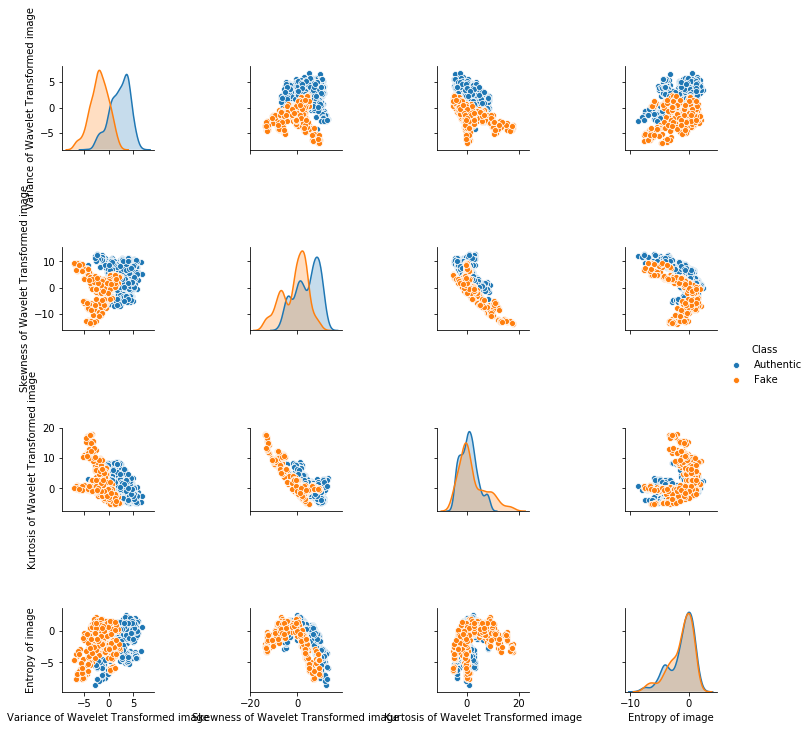

In [10]:

sns.pairplot(df,hue=target)

---
Create a support vector machine and split your dataset in train and test portions:

In [11]:
from sklearn import svm

In [12]:
svc = svm.SVC(gamma='scale')

In [13]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.5, random_state=0)

In [23]:
X_train.describe()

Variance of Wavelet Transformed image  \
count                             686.000000   
mean                                0.396104   
std                                 2.845722   
min                                -7.042100   
25%                                -1.787950   
50%                                 0.479625   
75%                                 2.726225   
max                                 6.563300   

       Skewness of Wavelet Transformed image  \
count                             686.000000   
mean                                1.937036   
std                                 5.834264   
min                               -13.773100   
25%                                -1.581450   
50%                                 2.216150   
75%                                 6.700325   
max                                12.951600   

       Kurtosis of Wavelet Transformed image  Entropy of image  
count                             686.000000        686.000000  
mean                                1.391981         -1.181749  
std                                 4.239649          2.141356  
min                                -5.261300         -7.785300  
25%                                -1.427175         -2.352025  
50%                                 0.529665         -0.558200  
75%                                 3.183950          0.429397  
max                                17.927400          2.135300

In [24]:
X_test.describe()

Variance of Wavelet Transformed image  \
count                             686.000000   
mean                                0.471367   
std                                 2.841377   
min                                -6.752600   
25%                                -1.757625   
50%                                 0.496180   
75%                                 2.894675   
max                                 6.824800   

       Skewness of Wavelet Transformed image  \
count                             686.000000   
mean                                1.907671   
std                                 5.907845   
min                               -13.677900   
25%                                -1.754775   
50%                                 2.476900   
75%                                 6.868425   
max                                12.624700   

       Kurtosis of Wavelet Transformed image  Entropy of image  
count                             686.000000        686.000000  
mean                                1.403273         -1.201564  
std                                 4.382369          2.061396  
min                                -5.286100         -8.548200  
25%                                -1.772875         -2.462275  
50%                                 0.683470         -0.649360  
75%                                 3.149475          0.341790  
max                                17.677200          2.449500

---
Fit your support vector machine to your test data:

In [25]:
from sklearn import svm
svc = svm.SVC(gamma='scale')
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

---
Predict the authenticity of a bank note and print the classification report:

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

   Authentic       1.00      0.99      1.00       385
        Fake       0.99      1.00      1.00       301

   micro avg       1.00      1.00      1.00       686
   macro avg       1.00      1.00      1.00       686
weighted avg       1.00      1.00      1.00       686



### Easy peasy!